In [2]:
import CPTAC.Endometrial as en

Welcome to the CPTAC data service package. Available datasets may be
viewed using CPTAC.list_data(). In order to access a specific data
set, import a CPTAC subfolder using either 'import CPTAC.Dataset' or
'from CPTAC import Dataset'.
******
Version: 0.3.1
******
Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Acetylation Proteomics Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
en.list_data()

Below are the available endometrial data frames contained in this package:
	 clinical
	 	 Dimensions: (144, 26)
	 derived_molecular
	 	 Dimensions: (144, 118)
	 experimental_setup
	 	 Dimensions: (144, 26)
	 acetylproteomics
	 	 Dimensions: (144, 10862)
	 proteomics
	 	 Dimensions: (144, 10999)
	 transcriptomics
	 	 Dimensions: (109, 28057)
	 circular_RNA
	 	 Dimensions: (109, 4945)
	 miRNA
	 	 Dimensions: (99, 2337)
	 CNA
	 	 Dimensions: (95, 28057)
	 phosphoproteomics
	 	 Dimensions: (144, 73212)
	 phosphoproteomics_gene
	 	 Dimensions: (144, 8466)
	 somatic_mutation_binary
	 	 Dimensions: (95, 51559)
	 somatic_mutation
	 	 Dimensions: (52560, 5)


In [4]:
en.list_api()

Help on package CPTAC.Endometrial in CPTAC:

NAME
    CPTAC.Endometrial

DESCRIPTION
    #   Copyright 2018 Samuel Payne sam_payne@byu.edu
    #   Licensed under the Apache License, Version 2.0 (the "License");
    #   you may not use this file except in compliance with the License.
    #   You may obtain a copy of the License at
    #       http://www.apache.org/licenses/LICENSE-2.0
    #   Unless required by applicable law or agreed to in writing, software
    #   distributed under the License is distributed on an "AS IS" BASIS,
    #   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    #   See the License for the specific language governing permissions and
    #   limitations under the License.

PACKAGE CONTENTS
    dataframe
    datatest
    fileLoader
    utilities

FUNCTIONS
    append_metadata_to_omics(metadata_df, omics_df, metadata_cols=None, omics_cols=None)
        Joins columns from a metadata dataframe (clinical, derived_molecular, or experimental

In [5]:
proteomics = en.get_proteomics()
samples = proteomics.index
proteins = proteomics.columns
print("Samples:",samples[0:30].tolist())
print("Proteins:",proteins[0:30].tolist())

Samples: ['S001', 'S002', 'S003', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010', 'S011', 'S012', 'S014', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030', 'S031', 'S032', 'S033']
Proteins: ['A1BG', 'A2M', 'A2ML1', 'A4GALT', 'AAAS', 'AACS', 'AADAT', 'AAED1', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AAR2', 'AARS', 'AARS2', 'AARSD1', 'AASDHPPT', 'AASS', 'AATF', 'ABAT', 'ABCA8', 'ABCB1', 'ABCB10', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCC1', 'ABCC10', 'ABCC3', 'ABCC4']


In [6]:
proteomics.head()

idx,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,...,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
S001,-1.180,-0.8630,-0.802,0.222,0.2560,0.6650,1.2800,-0.3390,0.412,-0.664,...,-0.08770,NaN,0.0229,0.1090,NaN,-0.332,-0.43300,-1.020,-0.1230,-0.0859
S002,-0.685,-1.0700,-0.684,0.984,0.1350,0.3340,1.3000,0.1390,1.330,-0.367,...,-0.03560,NaN,0.3630,1.0700,0.737,-0.564,-0.00461,-1.130,-0.0757,-0.4730
S003,-0.528,-1.3200,0.435,NaN,-0.2400,1.0400,-0.0213,-0.0479,0.419,-0.500,...,0.00112,-0.1450,0.0105,-0.1160,NaN,0.151,-0.07400,-0.540,0.3200,-0.4190
S005,-1.670,-1.1900,-0.443,0.243,-0.0993,0.7570,0.7400,-0.9290,0.229,-0.223,...,0.07250,-0.0552,-0.0714,0.0933,0.156,-0.398,-0.07520,-0.797,-0.0301,-0.4670
S006,-0.374,-0.0206,-0.537,0.311,0.3750,0.0131,-1.1000,NaN,0.565,-0.101,...,-0.17600,NaN,-1.2200,-0.5620,0.937,-0.646,0.20700,-1.850,-0.1760,0.0513


In [8]:
transcriptomics = en.get_transcriptomics()
transcriptomics.head()

idx,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
S001,4.02,2.16,3.27,13.39,5.88,6.79,1.55,0.97,10.34,1.96,...,11.06,10.73,8.40,9.78,10.88,5.93,11.52,10.23,11.50,11.47
S002,4.81,2.21,4.86,13.24,5.93,6.33,0.93,0.00,10.83,0.00,...,10.87,11.43,8.39,9.14,10.38,7.25,11.64,10.64,11.26,11.57
S003,6.24,6.43,3.68,14.32,6.53,9.42,2.79,0.00,10.98,2.13,...,10.06,10.13,8.35,9.27,10.46,6.85,11.60,10.21,11.51,11.09
S005,5.31,4.87,5.59,13.77,6.35,4.22,2.97,0.00,8.68,1.98,...,10.29,10.41,9.10,9.59,10.15,7.89,11.90,10.21,11.34,11.51
S006,9.84,8.83,7.00,13.12,6.49,6.83,1.80,0.00,11.42,3.28,...,10.36,11.24,8.60,9.44,11.80,9.32,11.97,9.77,11.37,12.35


In [9]:
clinical = en.get_clinical()
clinical.head()

,Proteomics_Participant_ID,Proteomics_Tumor_Normal,Country,Histologic_Grade_FIGO,Myometrial_invasion_Specify,Histologic_type,Treatment_naive,Tumor_purity,Path_Stage_Primary_Tumor-pT,Path_Stage_Reg_Lymph_Nodes-pN,...,Age,Diabetes,Race,Ethnicity,Gender,Tumor_Site,Tumor_Site_Other,Tumor_Focality,Tumor_Size_cm,Num_full_term_pregnancies
idx,,,,,,,,,,,,,,,,,,,,,
S001,C3L-00006,Tumor,United States,FIGO grade 1,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),pN0,...,64.0,No,White,Not-Hispanic or Latino,Female,Anterior endometrium,NaN,Unifocal,2.9,1
S002,C3L-00008,Tumor,United States,FIGO grade 1,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),pNX,...,58.0,No,White,Not-Hispanic or Latino,Female,Posterior endometrium,NaN,Unifocal,3.5,1
S003,C3L-00032,Tumor,United States,FIGO grade 2,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),pN0,...,50.0,Yes,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,4.5,4 or more
S005,C3L-00090,Tumor,United States,FIGO grade 2,under 50 %,Endometrioid,YES,Normal,pT1a (FIGO IA),pNX,...,75.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,3.5,4 or more
S006,C3L-00098,Tumor,United States,NaN,under 50 %,Serous,YES,Normal,pT1a (FIGO IA),pNX,...,63.0,No,White,Not-Hispanic or Latino,Female,"Other, specify",Anterior and Posterior endometrium,Unifocal,6.0,2


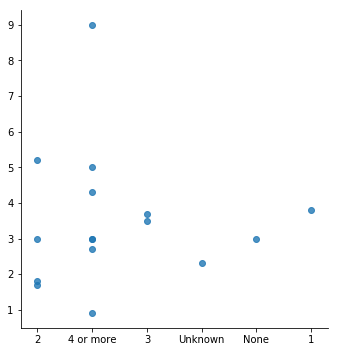

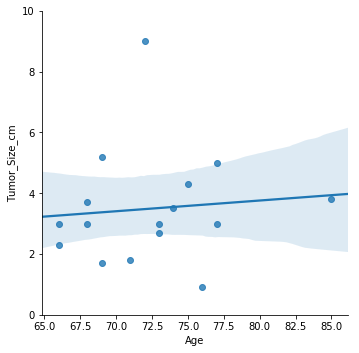

In [26]:
diabetic = clinical.loc[clinical['Diabetes'] == 'Yes']
retired_diabetic = diabetic.loc[diabetic['Age'] > 65]
retired_diabetic
sns.lmplot(x='Age', y='Tumor_Size_cm', data = retired_diabetic)
plt.ylim(0,10)
plt.show()

In [24]:
somatic_mutations = en.get_mutations()
somatic_mutations.head()

,Clinical_Patient_Key,Patient_Id,Gene,Mutation,Location
0,S001,C3L-00006,MXRA8,Frame_Shift_Del,p.R301Gfs*107
1,S001,C3L-00006,GNB1,Missense_Mutation,p.R314C
2,S001,C3L-00006,RPL22,Missense_Mutation,p.V72M
3,S001,C3L-00006,CASZ1,Missense_Mutation,p.R233Q
4,S001,C3L-00006,PRAMEF9,Missense_Mutation,p.L30M
